In [0]:
# Imports
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
#%matplotlib inline
import fix_yahoo_finance as yf
import datetime

from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [81]:
# stock data set

start = datetime.datetime(2010, 9, 13)
end = datetime.datetime(2011, 12, 30)

yf.pdr_override()
df_full = pdr.get_data_yahoo('^GSPC', start=start, end=end).reset_index()
df_full.describe()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
count,329.000000,329.000000,329.000000,329.000000,329.000000,3.290000e+02
mean,1249.315071,1258.110393,1240.016595,1249.742370,1249.742370,4.091353e+09
std,66.738517,64.321590,68.471135,66.422001,66.422001,9.203521e+08
min,1097.420044,1123.869995,1074.770020,1099.229980,1099.229980,1.025000e+09
25%,1192.979980,1200.290039,1183.339966,1194.890015,1194.890015,3.722320e+09
50%,1256.760010,1261.699951,1244.800049,1257.079956,1257.079956,4.129180e+09
75%,1311.050049,1317.699951,1303.489990,1309.660034,1309.660034,4.595380e+09
max,1365.209961,1370.579956,1358.689941,1363.609985,1363.609985,6.970630e+09


In [19]:
df_full.iloc[-1].name

328

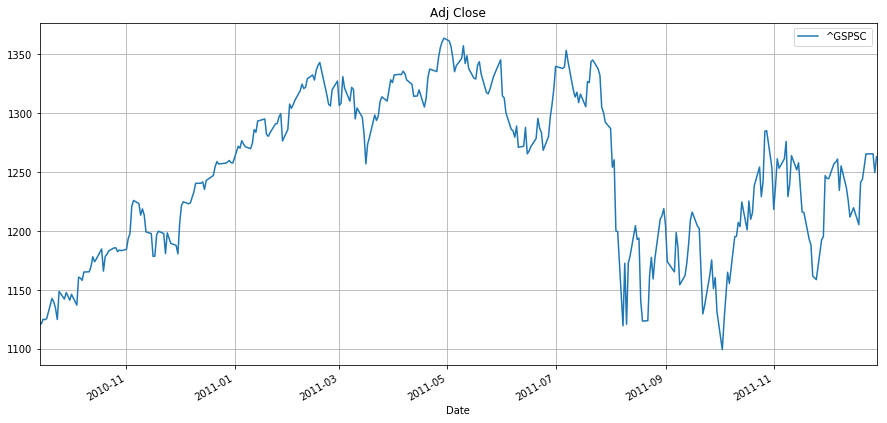

In [82]:
# fig
df_full.set_index('Date', inplace=True)
df_raw = df_full[df_full.columns[-2]]
df_raw.plot(label='^GSPSC', figsize=(15,7), title=df_full.columns[-2], grid=True, legend=True)

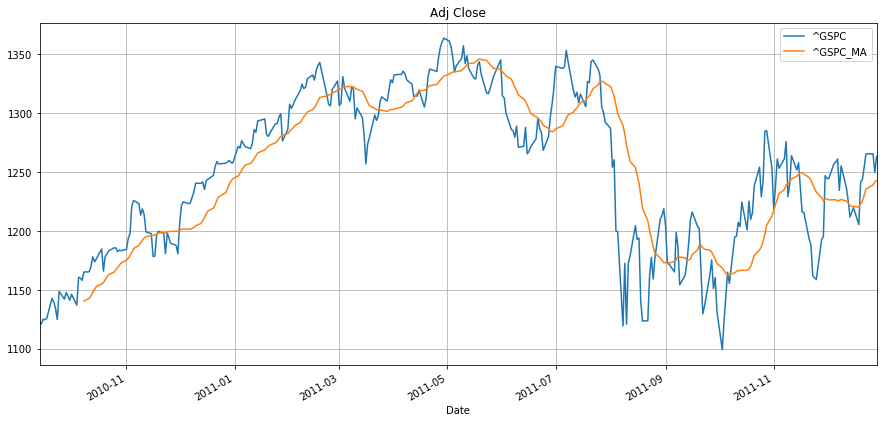

In [68]:
# plot moving average
window = 20
df_MA = df_full[df_full.columns[-2]].rolling(window).mean()
df_raw.plot(label='^GSPC', figsize=(15,7), title=df_full.columns[-2], grid=True, legend=True)
df_MA.plot(label='^GSPC'+'_MA', figsize=(15,7), title=df_full.columns[-2], grid=True, legend=True)

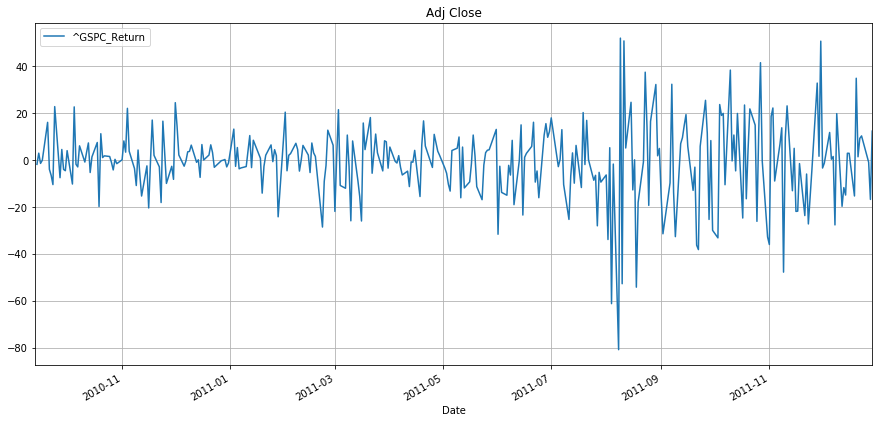

In [84]:
# plot return deviation
df_ret = df_full[df_full.columns[-2]] - df_full[df_full.columns[-2]].shift(1) - 1
df_ret.plot(label='^GSPC'+'_Return', figsize=(15,7), title=df_full.columns[-2], grid=True, legend=True)

In [0]:
# train and test

X = df_full.iloc[:,:-3].to_numpy() 
y = df_full.iloc[:,-3].to_numpy() 

num_data = df_full.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-2,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-2,1)

split_time = df_full.index[ind_split]

Training RMSE is: 5.188959
Testing RMSE is: 6.618387


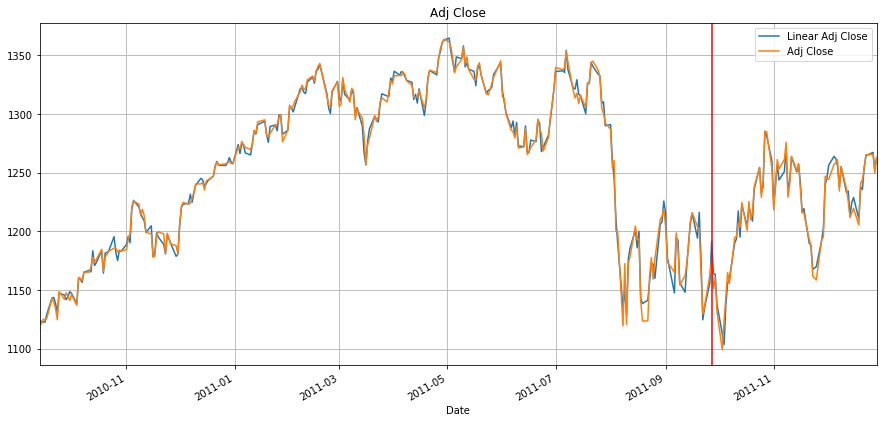

In [92]:
# Linear regression model
# train
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# test
trainings = reg_linear.predict(X_train).reshape(-2,1)
predictions = reg_linear.predict(X_test).reshape(-2,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_linear = pd.DataFrame(all_pred, columns=['Linear '+df_full.columns[-2]], index=df_full.index)
df_linear[df_full.columns[-2]] = y

# plot results and add train and test split timing line
df_linear.plot(label='^GSPC'+'_Linear', figsize=(15,7), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse = pd.DataFrame([train_rmse, test_rmse], columns=['Linear'], index=['training', 'testing'])

Training RMSE is: 5.188959
Testing RMSE is: 6.618461


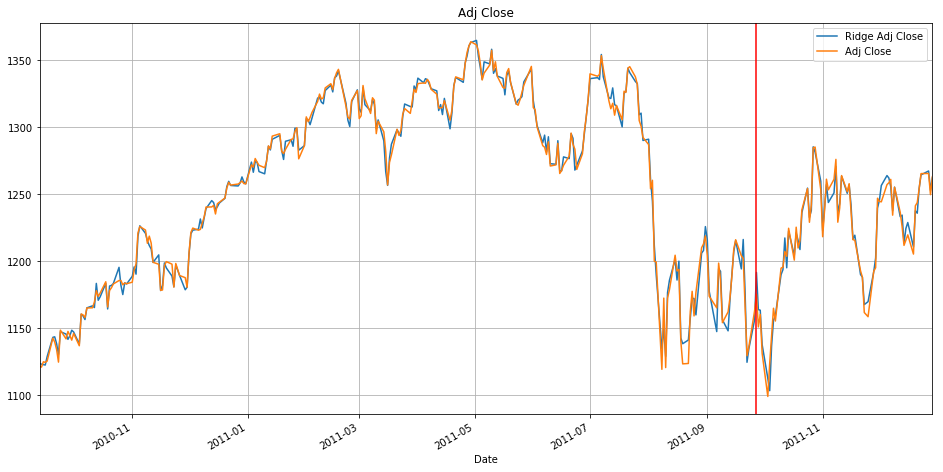

In [93]:
# Ridge regression model
# train
reg_ridge = Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)

# test
trainings = reg_ridge.predict(X_train).reshape(-2,1)
predictions = reg_ridge.predict(X_test).reshape(-2,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_ridge = pd.DataFrame(all_pred, columns=['Ridge '+df_full.columns[-2]], index=df_full.index)
df_ridge[df_full.columns[-2]] = y

# plot results and add trainand test split timing line
df_ridge.plot(label='^GSPC'+'_Ridge', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Ridge'] = [train_rmse, test_rmse]

Training RMSE is: 5.189010
Testing RMSE is: 6.623067


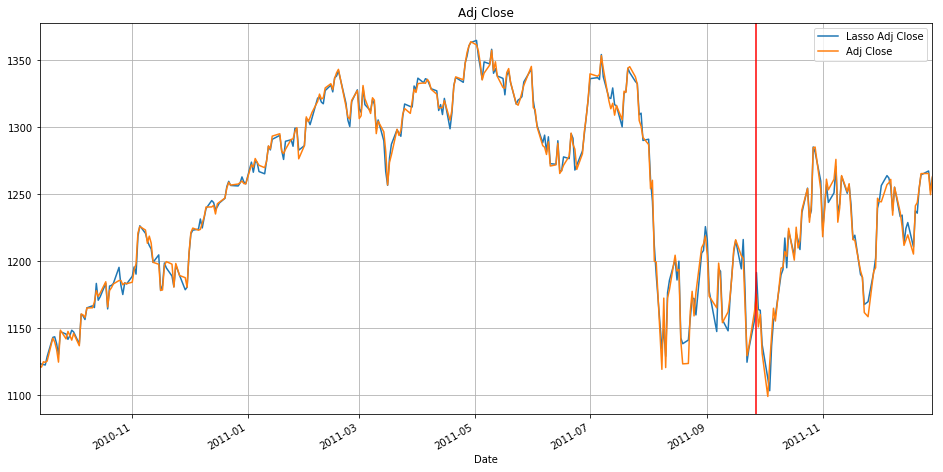

In [94]:
# Lasso regression model
# train
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

# test
trainings = reg_lasso.predict(X_train).reshape(-2,1)
predictions = reg_lasso.predict(X_test).reshape(-2,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_lasso = pd.DataFrame(all_pred, columns=['Lasso '+df_full.columns[-2]], index=df_full.index)
df_lasso[df_full.columns[-2]] = y

# plot results and add train and test split timing line
df_lasso.plot(label='^GSPC'+'_Lasso', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Lasso'] = [train_rmse, test_rmse]

Training RMSE is: 5.568931
Testing RMSE is: 11.618386


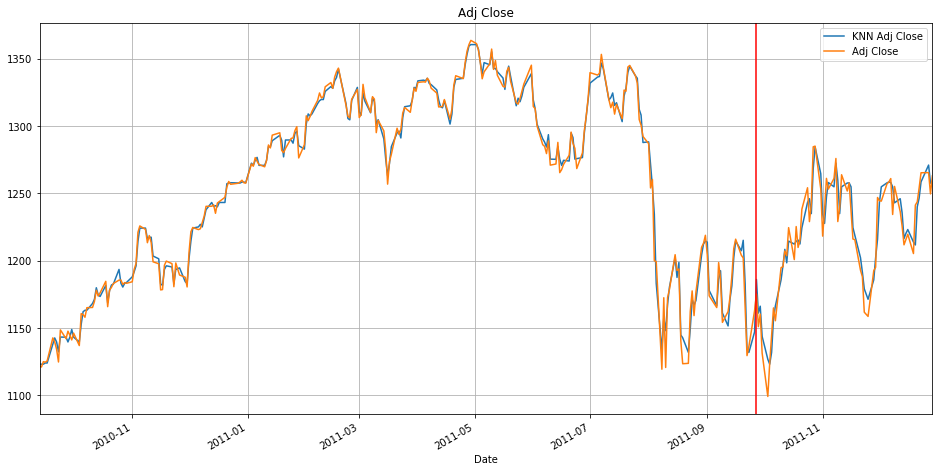

In [95]:
# KNN regression model
# train
reg_knn = KNeighborsRegressor(n_neighbors=4)
reg_knn.fit(X_train, y_train)

# test
trainings = reg_knn.predict(X_train).reshape(-2,1)
predictions = reg_knn.predict(X_test).reshape(-2,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_knn = pd.DataFrame(all_pred, columns=['KNN '+df_full.columns[-2]], index=df_full.index)
df_knn[df_full.columns[-2]] = y

# plot results and add train and test split timing line
df_knn.plot(label='^GSPC'+'_KNN', figsize=(16,8), title=df_full.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['KNN'] = [train_rmse, test_rmse]

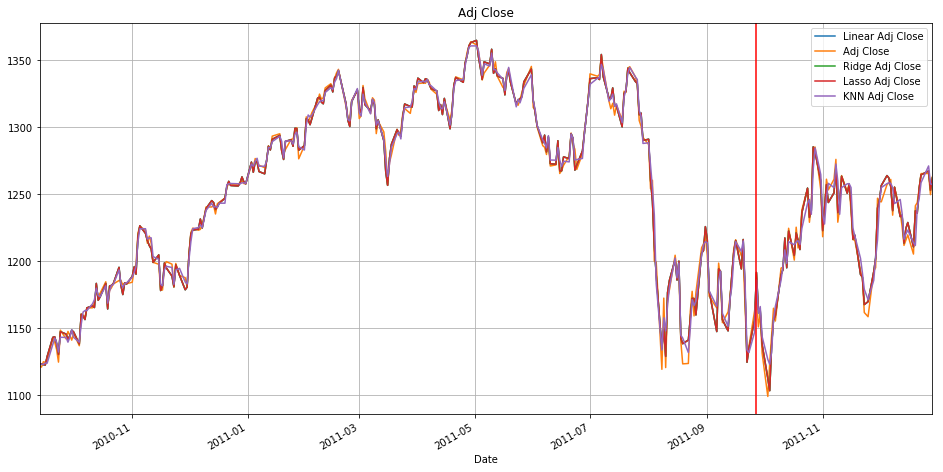

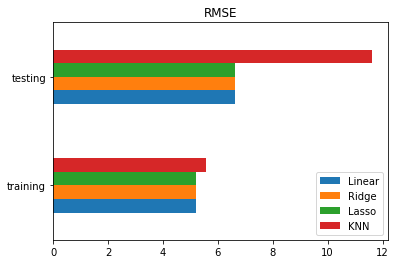

In [96]:
# All models in one plot
df_all = df_linear
df_all[df_ridge.columns[0]] = df_ridge[df_ridge.columns[0]]
df_all[df_lasso.columns[0]] = df_lasso[df_lasso.columns[0]]
df_all[df_knn.columns[0]] = df_knn[df_knn.columns[0]]

# plot results and add train and test split timing line
df_all.plot(label='^GSPC', figsize=(16,8), title=df_all.columns[1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

df_rmse.plot(kind='barh', title='RMSE')